# Modelos de series de tiempo con Python
# Modelos Univariados

# I. Modelos univariados

## 1) Cargar la base de datos

In [ ]:
import numpy as np
# Importar base de datos
import statsmodels.api as sm
# Estimar el modelo 
import statsmodels.tsa.api as tsa

In [ ]:
mdata=sm.datasets.macrodata.load().data

In [ ]:
mdata

rec.array([(1959., 1.,  2710.349, 1707.4,  286.898,  470.045,  1886.9,  28.98 ,  139.7,  2.82,  5.8, 177.146,  0.  ,  0.  ),
           (1959., 2.,  2778.801, 1733.7,  310.859,  481.301,  1919.7,  29.15 ,  141.7,  3.08,  5.1, 177.83 ,  2.34,  0.74),
           (1959., 3.,  2775.488, 1751.8,  289.226,  491.26 ,  1916.4,  29.35 ,  140.5,  3.82,  5.3, 178.657,  2.74,  1.09),
           (1959., 4.,  2785.204, 1753.7,  299.356,  484.052,  1931.3,  29.37 ,  140. ,  4.33,  5.6, 179.386,  0.27,  4.06),
           (1960., 1.,  2847.699, 1770.5,  331.722,  462.199,  1955.5,  29.54 ,  139.6,  3.5 ,  5.2, 180.007,  2.31,  1.19),
           (1960., 2.,  2834.39 , 1792.9,  298.152,  460.4  ,  1966.1,  29.55 ,  140.2,  2.68,  5.2, 180.671,  0.14,  2.55),
           (1960., 3.,  2839.022, 1785.8,  296.375,  474.676,  1967.8,  29.75 ,  140.9,  2.36,  5.6, 181.528,  2.7 , -0.34),
           (1960., 4.,  2802.616, 1788.2,  259.764,  476.434,  1966.6,  29.84 ,  141.1,  2.29,  6.3, 182.287,  1.21,  1.08),


In [ ]:
endog=np.log(mdata["m1"])
endog

array([4.93949727, 4.95371215, 4.94520749, 4.94164242, 4.93878119,
       4.94306997, 4.94805042, 4.94946886, 4.95653104, 4.96214508,
       4.9705075 , 4.9781121 , 4.9863426 , 4.98702543, 4.98838969,
       4.99923725, 5.00863329, 5.01926462, 5.02782012, 5.03500265,
       5.04213396, 5.05497111, 5.07016127, 5.07953927, 5.08759634,
       5.09436351, 5.11198779, 5.13049026, 5.14633101, 5.13756159,
       5.14283246, 5.14691291, 5.16020406, 5.18234519, 5.20180647,
       5.21656486, 5.22896729, 5.24965219, 5.26785816, 5.29179615,
       5.30181126, 5.30678144, 5.31271325, 5.32884657, 5.33126847,
       5.33753808, 5.36082257, 5.37296091, 5.39362755, 5.41565586,
       5.42583069, 5.438514  , 5.46213545, 5.47562638, 5.50125821,
       5.52744299, 5.53220301, 5.55101972, 5.55682806, 5.57519124,
       5.58799744, 5.595826  , 5.6069044 , 5.61276308, 5.62112524,
       5.64791734, 5.65389171, 5.66434841, 5.68595789, 5.69440531,
       5.71042702, 5.73107333, 5.75574221, 5.7689458 , 5.78812

In [ ]:
exog=np.column_stack([ [np.log(mdata["realgdp"])], [np.log(mdata["cpi"])] ])
exog

array([[7.90483269, 7.92977482, 7.92858187, 7.9320764 , 7.95426658,
        7.94958203, 7.95121491, 7.93830855, 7.94423114, 7.96276567,
        7.97879731, 7.99895013, 8.01672739, 8.0277079 , 8.03691197,
        8.03933899, 8.0523242 , 8.06477703, 8.08343107, 8.09100493,
        8.1132008 , 8.12462072, 8.1381175 , 8.14088593, 8.16515064,
        8.17862757, 8.19871784, 8.2225574 , 8.24680682, 8.25013014,
        8.25668546, 8.2647547 , 8.27352545, 8.27373366, 8.28167995,
        8.28928079, 8.3096801 , 8.32651635, 8.33333453, 8.33765807,
        8.35328506, 8.35619311, 8.36249723, 8.35778964, 8.35621966,
        8.35803074, 8.36689551, 8.35623469, 8.38343686, 8.38909365,
        8.39704453, 8.39981947, 8.41754279, 8.44098169, 8.4505197 ,
        8.46685649, 8.49211453, 8.50361563, 8.49826559, 8.50775883,
        8.49895121, 8.50150843, 8.49157175, 8.48762843, 8.47539051,
        8.48300374, 8.49970679, 8.51268525, 8.53516336, 8.54265565,
        8.54754236, 8.55477776, 8.56631892, 8.58

In [ ]:
exog=sm.add_constant(exog,prepend=True)
exog

array([[7.90483269, 7.92977482, 7.92858187, 7.9320764 , 7.95426658,
        7.94958203, 7.95121491, 7.93830855, 7.94423114, 7.96276567,
        7.97879731, 7.99895013, 8.01672739, 8.0277079 , 8.03691197,
        8.03933899, 8.0523242 , 8.06477703, 8.08343107, 8.09100493,
        8.1132008 , 8.12462072, 8.1381175 , 8.14088593, 8.16515064,
        8.17862757, 8.19871784, 8.2225574 , 8.24680682, 8.25013014,
        8.25668546, 8.2647547 , 8.27352545, 8.27373366, 8.28167995,
        8.28928079, 8.3096801 , 8.32651635, 8.33333453, 8.33765807,
        8.35328506, 8.35619311, 8.36249723, 8.35778964, 8.35621966,
        8.35803074, 8.36689551, 8.35623469, 8.38343686, 8.38909365,
        8.39704453, 8.39981947, 8.41754279, 8.44098169, 8.4505197 ,
        8.46685649, 8.49211453, 8.50361563, 8.49826559, 8.50775883,
        8.49895121, 8.50150843, 8.49157175, 8.48762843, 8.47539051,
        8.48300374, 8.49970679, 8.51268525, 8.53516336, 8.54265565,
        8.54754236, 8.55477776, 8.56631892, 8.58

## 2) Visualización de los datos

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'realgdp')

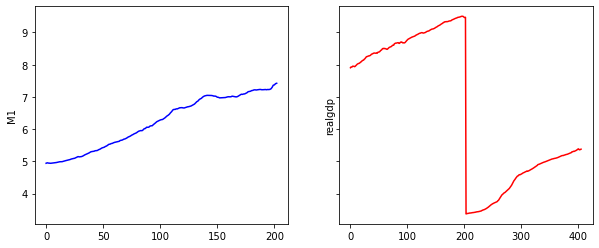

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

axes[0].plot(endog, color="blue")
axes[0].set_ylabel("M1")

axes[1].plot(exog[0], 'r')
axes[1].set_ylabel("realgdp")

## 3) Suavizamiento

In [ ]:
help(tsa.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

In [ ]:
descomposicion=tsa.seasonal_decompose(endog,model="additive",period=4)

In [ ]:
observado=descomposicion.observed
tendencia=descomposicion.trend
estacional=descomposicion.seasonal
aleatorio=descomposicion.resid

In [ ]:
import pandas as pd
df=pd.DataFrame(np.column_stack([observado,tendencia,estacional,aleatorio]))
df.columns = ["observado","tendencia","estacional","aleatorio"]
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))
df

,observado,tendencia,estacional,aleatorio
1959-03-31,4.939497,NaN,0.000079,NaN
1959-06-30,4.953712,NaN,-0.000882,NaN
1959-09-30,4.945207,4.944925,-0.000397,0.000679
1959-12-31,4.941642,4.943506,0.001200,-0.003063
1960-03-31,4.938781,4.942531,0.000079,-0.003829
...,...,...,...,...
2008-09-30,7.296210,7.303253,-0.000397,-0.006646
2008-12-31,7.362962,7.340800,0.001200,0.020963
2009-03-31,7.373249,7.376620,0.000079,-0.003451
2009-06-30,7.410710,NaN,-0.000882,NaN


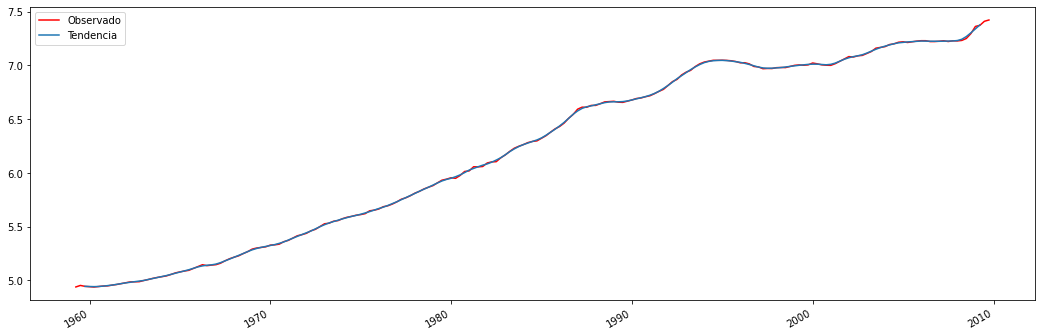

In [ ]:
fig= plt.subplots(figsize=(18,6))
plt.plot(df["observado"],label="Observado", c='red')
df["tendencia"].plot(label="Tendencia")
plt.legend()
# plt.savefig('intro-trend.png');

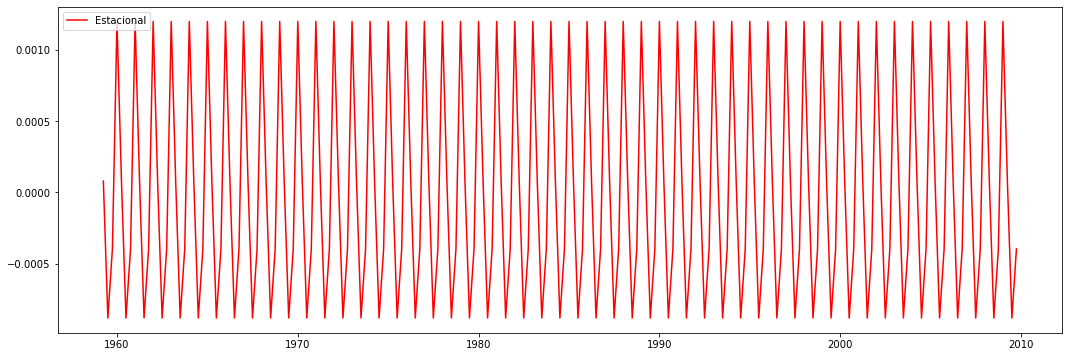

In [ ]:
fig= plt.subplots(figsize=(18,6))
plt.plot(df["estacional"],label="Estacional", c='red')
plt.legend(loc="upper left")

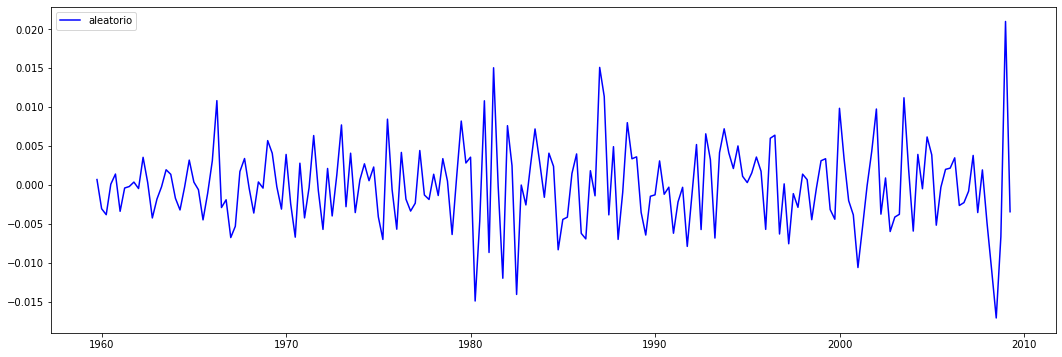

In [ ]:
fig= plt.subplots(figsize=(18,6))
plt.plot(df["aleatorio"],label="aleatorio", c='blue')
plt.legend(loc="upper left")

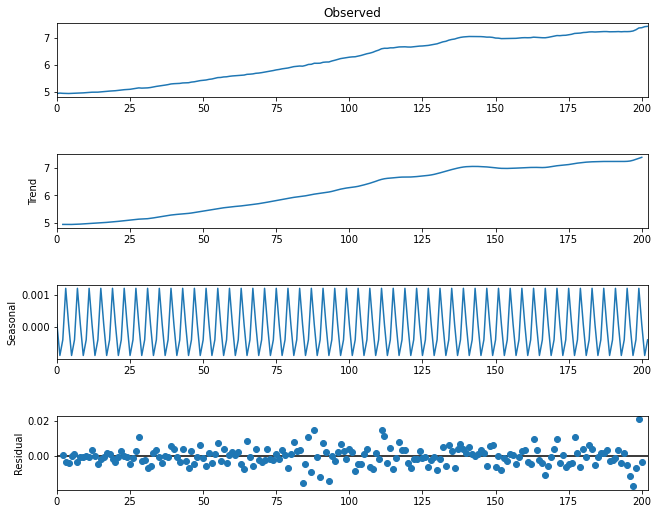

In [ ]:
fig=descomposicion.plot()
fig.set_size_inches(10,8)

# Filtros

In [ ]:
from scipy.signal import lfilter

In [ ]:
data2=sm.datasets.macrodata.load()

In [ ]:
infl=data2.data.infl[1:]
infl

array([ 2.34,  2.74,  0.27,  2.31,  0.14,  2.7 ,  1.21, -0.4 ,  1.47,
        0.8 ,  0.8 ,  2.26,  0.13,  2.11,  0.79,  0.53,  2.75,  0.78,
        2.46,  0.13,  0.9 ,  1.29,  2.05,  1.28,  2.54,  0.89,  2.9 ,
        4.99,  2.1 ,  4.9 ,  0.61,  2.42,  3.61,  3.58,  4.72,  3.5 ,
        5.77,  4.56,  4.51,  6.67,  5.47,  5.4 ,  6.38,  6.28,  4.13,
        5.11,  5.04,  2.  ,  4.96,  2.94,  2.92,  2.9 ,  2.88,  3.81,
        4.71,  9.26,  4.55, 12.47, 10.39, 10.96,  9.86, 13.56, 10.07,
        5.32,  7.48,  6.61,  6.5 ,  2.14,  6.37,  6.27,  5.49,  8.76,
        5.3 ,  5.23,  7.08,  7.58,  9.89,  9.65,  8.26, 12.08, 13.37,
       11.88, 14.62, 14.6 ,  8.32, 10.04, 11.64,  8.62, 10.63,  8.22,
        4.26,  2.53, 10.39,  2.45, -0.82,  3.66,  4.03,  3.99,  5.13,
        4.67,  3.09,  3.82,  2.28,  4.89,  2.61,  2.96,  5.13, -4.39,
        2.93,  2.55,  4.33,  4.64,  3.89,  4.2 ,  3.46,  4.12,  4.41,
        4.7 ,  4.31,  6.22,  4.52,  2.88,  6.64,  4.37,  4.93,  8.79,
        3.88,  1.19,

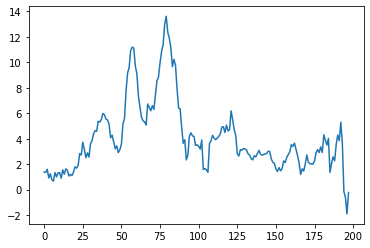

In [ ]:
l_infl=lfilter(np.ones(4)/4,1,infl)[4:]
plt.plot(l_infl)

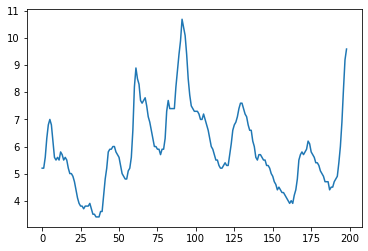

In [ ]:
unemp=data2.data.unemp[4:]
plt.plot(unemp)

In [ ]:
infl_c, infl_t = tsa.filters.hpfilter(infl)
unemp_c, unemp_t = tsa.filters.hpfilter(unemp)

In [ ]:
type(infl_c)

numpy.ndarray

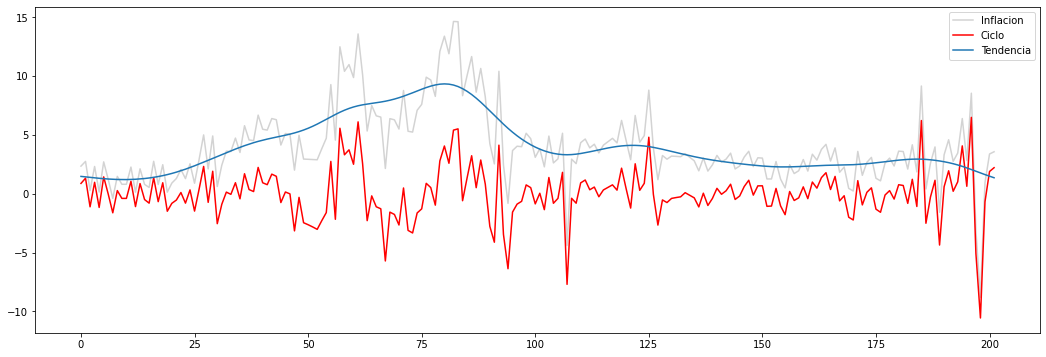

In [ ]:
fig= plt.subplots(figsize=(18,6))
plt.plot(infl,label="Inflacion", c='lightgrey')
plt.plot(infl_c,label="Ciclo", c='red')
plt.plot(infl_t,label="Tendencia")
plt.legend()

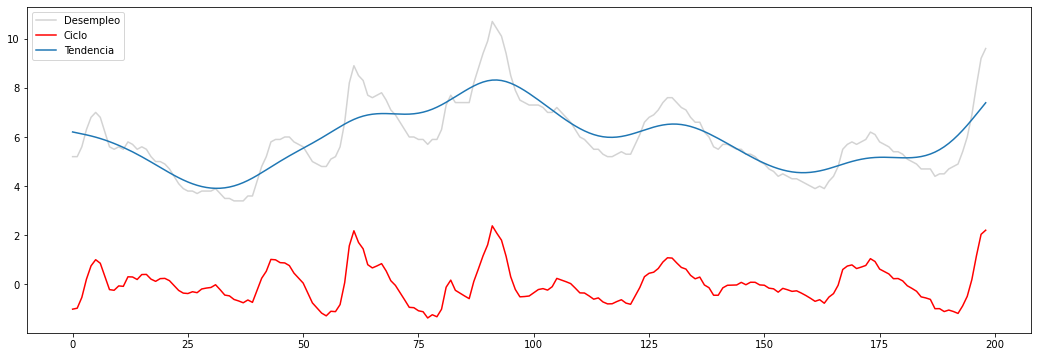

In [ ]:
fig= plt.subplots(figsize=(18,6))
plt.plot(unemp,label="Desempleo", c='lightgrey')
plt.plot(unemp_c,label="Ciclo", c='red')
plt.plot(unemp_t,label="Tendencia")
plt.legend()

## 4) Modelo de Holt Winter

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
fit1 = ExponentialSmoothing(unemp, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(unemp, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(unemp, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(unemp, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True).fit(use_boxcox=True)

C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


In [ ]:
fit1.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.7689428713497319,
 'smoothing_seasonal': 1.4616792379241407e-08,
 'damping_trend': nan,
 'initial_level': 1.5137962715059836,
 'initial_trend': 0.015872335943090204,
 'initial_seasons': array([-0.03306576, -0.03392492, -0.03330195, -0.03515031]),
 'use_boxcox': True,
 'lamda': -0.11943089130822852,
 'remove_bias': False}

In [ ]:
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]
results

,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
$\beta$,7.689429e-01,7.653629e-01,8.438328e-01,8.401760e-01
$\phi$,NaN,NaN,8.000000e-01,8.000000e-01
$\gamma$,1.461679e-08,1.462878e-08,1.441670e-08,1.421900e-08
$l_0$,1.513796e+00,1.449722e+00,1.517531e+00,1.465016e+00
$b_0$,1.587234e-02,1.543138e-02,1.387483e-02,1.362804e-02
SSE,1.676153e+01,1.667408e+01,1.342922e+01,1.336989e+01


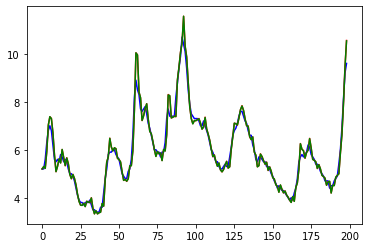

In [ ]:
plt.plot(pd.DataFrame(unemp),color='blue')
plt.plot(pd.DataFrame(fit1.fittedvalues),color='red')
plt.plot(pd.DataFrame(fit2.fittedvalues),color='green')

#fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
#fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()

## 5) Modelo ARIMA

In [ ]:
mdata=sm.datasets.macrodata.load().data

In [ ]:
m1=pd.Series(np.log(mdata["m1"]))
m1.shape

(203,)

In [ ]:
gdp=pd.Series(np.log(mdata["realgdp"]))
gdp.shape

(203,)

In [ ]:
cpi=pd.Series(np.log(mdata["cpi"]))
cpi.shape

(203,)

In [ ]:
st=pd.concat([m1,gdp,cpi],axis=1)

### 5.1) ¿Es estacionaria?

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
        values 0, 1, ..., maxlag.
    
        * If "AIC" (default)

In [ ]:
adfuller(m1,regression="ct")[:2]

(-1.7691857007076834, 0.7194235123378239)

In [ ]:
adfuller(gdp,regression="ct")[:2]

(-2.3828718387219077, 0.3887635443995839)

In [ ]:
adfuller(cpi,regression="ct")[:2]

(-1.1616259994547666, 0.918074711810391)

In [ ]:
adfuller(np.diff(gdp),regression="c")[:2]

(-6.972871347216239, 8.575095844898133e-10)

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
kpss(gdp,regression="ct")[:2]

C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.15782514392665725, 0.04014571339445228)

In [ ]:
kpss(cpi,regression="ct")[:2]

C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(0.25614530006850805, 0.01)

In [ ]:
kpss(m1,regression="ct")[:2]

C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(0.2294990776014662, 0.01)

### 5.2) Identificación de la estructura de la serie de tiempo 

### Función de Autorcorrelación Simple (acf) y Función de Autocorrelación Parcialn (pacf)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

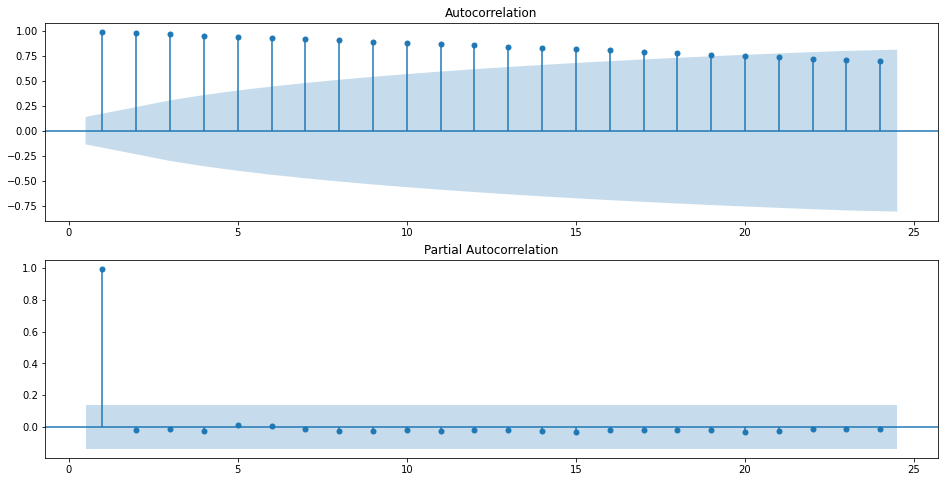

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(211)
fig = plot_acf(m1, lags=24, ax=ax, zero=False)

ax = fig.add_subplot(212)
fig = plot_pacf(m1, lags=24, ax=ax, zero=False)

### 5.3) Estimación

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
res1=smf.ols("m1~gdp+cpi",data=st).fit()

In [ ]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                     m1   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9871.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          1.34e-200
Time:                        16:29:12   Log-Likelihood:                 221.75
No. Observations:                 203   AIC:                            -437.5
Df Residuals:                     200   BIC:                            -427.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5016      0.353     -4.256      0.0

### 5.4) Diagnóstico del modelo

In [ ]:
help(tsa.acf)

Help on function acf in module statsmodels.tsa.stattools:

acf(x, adjusted=False, nlags=None, qstat=False, fft=None, alpha=None, missing='none')
    Calculate the autocorrelation function.
    
    Parameters
    ----------
    x : array_like
       The time series data.
    adjusted : bool, default False
       If True, then denominators for autocovariance are n-k, otherwise n.
    nlags : int, default 40
        Number of lags to return autocorrelation for.
    qstat : bool, default False
        If True, returns the Ljung-Box q statistic for each autocorrelation
        coefficient.  See q_stat for more information.
    fft : bool, default None
        If True, computes the ACF via FFT.
    alpha : scalar, default None
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence intervals are
        returned where the standard deviation is computed according to
        Bartlett"s formula.
    missing : s

In [ ]:
acf, ci, Q, pvalue = tsa.acf(res1.resid, nlags=4, alpha=5,qstat=True, adjusted=True)

In [ ]:
acf

array([1.        , 0.98234045, 0.94759323, 0.90362911, 0.84956461])

In [ ]:
pvalue

array([3.81138443e-045, 2.89157008e-084, 6.94932940e-120, 2.19208642e-151])

C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


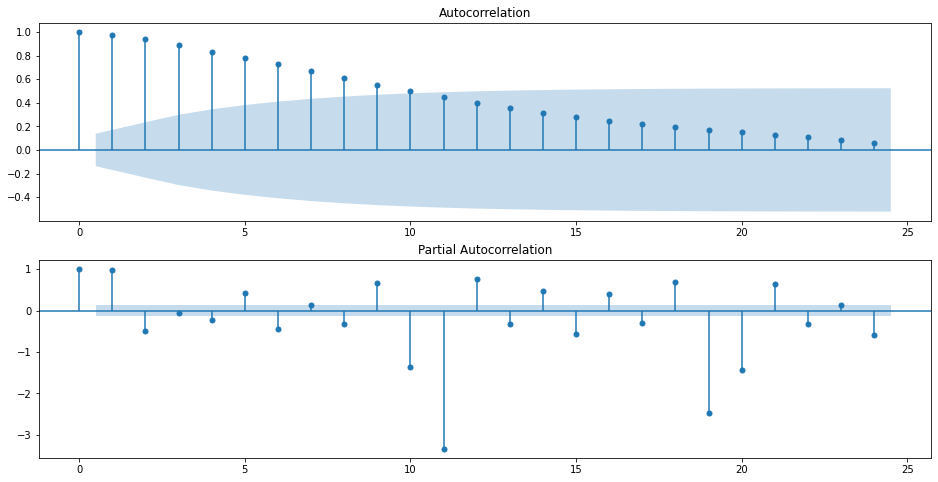

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(211)
fig = plot_acf(res1.resid, lags=24, ax=ax)

ax = fig.add_subplot(212)
fig = plot_pacf(res1.resid, lags=24, ax=ax)

# SARIMAX

In [ ]:
from statsmodels.tsa.statespace import sarimax

In [ ]:
help(sarimax)

Help on module statsmodels.tsa.statespace.sarimax in statsmodels.tsa.statespace:

NAME
    statsmodels.tsa.statespace.sarimax - SARIMAX Model

DESCRIPTION
    Author: Chad Fulton
    License: Simplified-BSD

CLASSES
    statsmodels.tsa.statespace.mlemodel.MLEModel(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
        SARIMAX
    statsmodels.tsa.statespace.mlemodel.MLEResults(statsmodels.tsa.base.tsa_model.TimeSeriesModelResults)
        SARIMAXResults
    statsmodels.tsa.statespace.mlemodel.MLEResultsWrapper(statsmodels.base.wrapper.ResultsWrapper)
        SARIMAXResultsWrapper
    
    class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
     |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=Fal

In [ ]:
model = sarimax.SARIMAX(
    np.log(unemp),
    trend='n',
    order=(1,1,0),
    seasonal_order=(1,1,0,4),
    enforce_stationarity=True,
    enforce_invertibility=True)

In [ ]:
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  199
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                 293.974
Date:                           Mon, 06 Sep 2021   AIC                           -581.948
Time:                                   16:30:24   BIC                           -572.144
Sample:                                        0   HQIC                          -577.978
                                           - 199                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5976      0.052     11.460      0.000       0.495       0.700
ar.S.L4       -0.4560      0.063     -7.238

### 5.5) Proyección

In [ ]:
forecast = results.get_forecast(steps=8)
forecast_ci = forecast.conf_int()

In [ ]:
y_est = forecast.predicted_mean
y_est

array([2.32672549, 2.41100287, 2.51720065, 2.58398587, 2.68042028,
       2.79780766, 2.91270443, 2.96788021])

In [ ]:
forecast_ci

array([[2.22285447, 2.43059651],
       [2.21522987, 2.60677588],
       [2.23514922, 2.79925207],
       [2.22305245, 2.94491928],
       [2.21428979, 3.14655077],
       [2.22281894, 3.37279639],
       [2.23348396, 3.5919249 ],
       [2.19131327, 3.74444715]])

### 5.6) Evaluando la proyección

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def theils_u_metric(y_true, y_pred):
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))